In [ ]:
# run benchmark
!python auto_website_benchmark.py ./chromium_version.txt ./website.txt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import copy as cpy
import numpy as np
%matplotlib inline



In [67]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_04_08_2017_13_28_30_clustering_rare_inherit_center_2.pkl"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print(benchmark_data)

{(u'Yahoo_Games', u'group_optimized_experiment', 1501814321.208849): object
CSSSelector                         68.575646
ComputedStyle                       48.088561
InvalidationSet                    107.702688
LayoutObject                        60.853980
Node                                96.000000
StyleBackgroundData                  2.656827
StyleBoxData                         6.169742
StyleDeprecatedFlexibleBoxData       0.305746
StyleInheritedData                  13.298893
StyleInheritedLayer1Data             0.255140
StyleMultiColData                    0.105430
StylePropertySet                     5.679494
StyleRareInheritedData               2.412230
StyleRareNonInheritedData           15.837638
StyleRareNonInheritedLayer0Data      8.236162
StyleRareNonInheritedLayer1Data      1.288350
StyleRareNonInheritedLayer2Data      2.083289
StyleSurroundData                   26.599895
StyleVisualData                      2.412230
Name: 1501814346775, dtype: float64, (u'Yahoo_Game

In [68]:
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

['Website', 'ChromiumVersion', 'TimeStamp', 'Total', 'TotalStyle']
set(['ComputedStyle', 'StyleRareNonInheritedLayer1Data', 'StyleTransformData', 'StyleRareNonInheritedLayer2Data', 'StyleFilterOpsData', 'Website', 'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleInheritedLayer1Data', 'StyleFlexibleBoxData', 'StyleBoxData', 'Node', 'TimeStamp', 'LayoutObject', 'StyleBackgroundData', 'InvalidationSet', 'StyleWillChangeData', 'StyleInheritedData', 'ChromiumVersion', 'StyleRareNonInheritedLayer0Data', 'TotalStyle', 'StyleMultiColData', 'CSSSelector', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', 'Total', 'StyleVisualData'])


In [69]:
style_fields = ['ComputedStyle', 'StyleTransformData', 'StyleFilterOpsData', \
                'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleFlexibleBoxData', \
                'StyleBoxData', 'StyleBackgroundData', 'StyleWillChangeData', 'StyleInheritedData', \
                'StyleMultiColData', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', \
                'StyleVisualData']
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i in style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].mean()

     CSSSelector             ChromiumVersion  ComputedStyle  InvalidationSet  \
0      68.575646  group_optimized_experiment      48.088561       107.702688   
1      66.440945  group_optimized_experiment      44.866142       100.606299   
2      49.247629                    original      56.531085        86.794521   
3      60.562897  group_optimized_experiment      99.056677       131.936964   
4      50.357171                    original      21.423994        41.753810   
5      36.868834                    original      36.383939        46.884895   
6       3.118958                    original      63.434303         3.132755   
7      45.624580  group_optimized_experiment      37.420088        73.406662   
8     114.785458  group_optimized_experiment     125.476703       221.271889   
9      73.579656  group_optimized_experiment      79.120419        68.176515   
10     64.508411  group_optimized_experiment     105.091589       121.525234   
11     49.247629                    orig

In [45]:
benchmark_dataframe.to_csv("benchmark.csv")

In [22]:
# benchmark_dataframe.groupby(["Website"]).plot.bar(x="ChromiumVersion", y="Total")

34.5009387488
38.1851170093


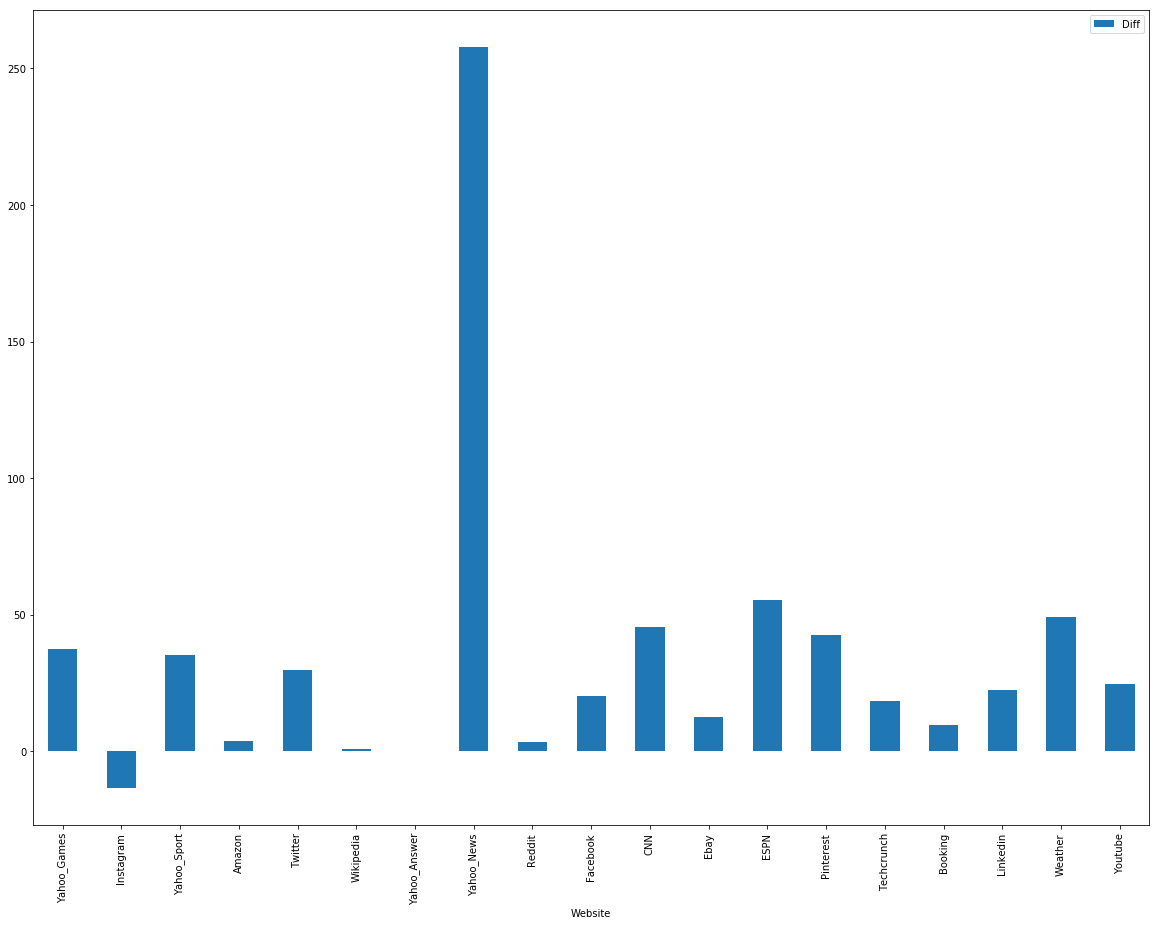

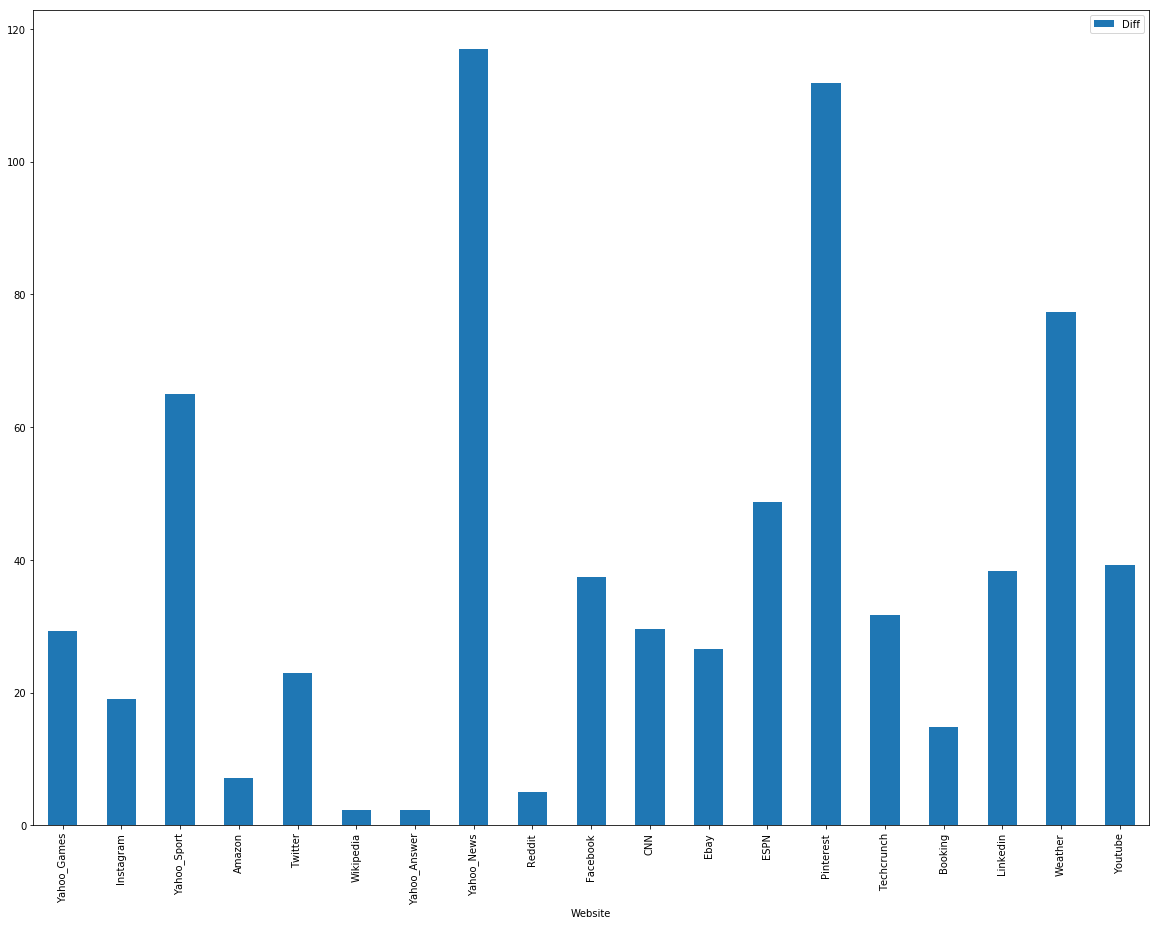

In [70]:
website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].Total.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].Total.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))

website_diff_data = {"Website": [], "Diff": []}

for website in benchmark_dataframe.Website.unique():
    website_data = benchmark_dataframe[benchmark_dataframe.Website == website]
    website_diff = np.mean(website_data[website_data.ChromiumVersion == "original"].TotalStyle.iloc[:]) \
                    - np.mean(website_data[website_data.ChromiumVersion != "original"].TotalStyle.iloc[:])
    website_diff_data["Website"] += [website]
    website_diff_data["Diff"] += [website_diff]
    
website_diff_dataframe = pd.DataFrame(data=website_diff_data)
print np.mean(website_diff_data["Diff"])
website_diff_dataframe.plot.bar(x="Website", y="Diff", figsize=(20,15))

In [17]:
# read data
benchmark_data = None
pickle_data_filename = "./mini_benchmark_param"
with open(pickle_data_filename, "r") as fo:
    benchmark_data = pkl.load(fo)
    
print benchmark_data
special_fields = ["Website", "ChromiumVersion", "TimeStamp", "Total", "TotalStyle"]
fields = cpy.deepcopy(special_fields)
# a = pd.concat(benchmark_data.values(), axis=1)
for value in benchmark_data.values():
    fields += [i for i in value.axes[0]]
    
fields = set(fields)
print special_fields
print fields

style_fields = ['ComputedStyle', 'StyleTransformData', 'StyleFilterOpsData', \
                'StyleDeprecatedFlexibleBoxData', 'StyleSurroundData', 'StyleFlexibleBoxData', \
                'StyleBoxData', 'StyleBackgroundData', 'StyleWillChangeData', 'StyleInheritedData', \
                'StyleMultiColData', 'StyleRareNonInheritedData', 'StyleRareInheritedData', 'StylePropertySet', \
                'StyleVisualData']
data_ = {}
for key in fields:
    data_[key] = []

for key in benchmark_data.keys():
    data_["Website"] += [key[0]]
    data_["ChromiumVersion"] += [key[1]]
    data_["TimeStamp"] += [key[2]]
    total = sum(benchmark_data[key])
    total_style = sum([benchmark_data[key][i] for i in benchmark_data[key].axes[0] if i in style_fields])
    for key_data in benchmark_data[key].axes[0]:
        data_[key_data] += [benchmark_data[key][key_data]]
    for key_empty in fields - set(special_fields) - set(benchmark_data[key].axes[0]):
        data_[key_empty] += [0]
    data_["Total"] += [total]
    data_["TotalStyle"] += [total_style]
    
benchmark_dataframe = pd.DataFrame(data=data_)
print benchmark_dataframe.iloc[benchmark_dataframe.groupby("Website", as_index=False)["Total"].idxmin()]
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].median()
print benchmark_dataframe.groupby("ChromiumVersion", as_index=False)["Total"].count()

IOError: [Errno 2] No such file or directory: './mini_benchmark_param'